# Zomato Data Set Analysis & Visualization

# Step 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)
plt.style.use('dark_background')

# Step 2 Reading Parquet Data Set 

In [2]:
import pandas as pd

# Define the columns you want to read
columns = ['name', 'online_order', 'book_table', 'rate', 'votes',
           'location', 'rest_type', 'cuisines',
           'approx_cost(for two people)',  
           'listed_in(type)']

# Read the csv file
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

# Select only the desired columns
df = df[columns]

# Display the first few rows of the DataFrame
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [3]:
df.shape

(51717, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


# Step 3. Droping Duplicates

In [5]:
# Calculate the number of duplicate rows
num_duplicates = len(df) - len(df.drop_duplicates())

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 16706


In [6]:
df.drop_duplicates(inplace=True)
df.shape

(35011, 10)

# Step 4. Cleaning `Rate` Column

In [7]:
import numpy as np

# Extract the value before '/' for each element in the 'rate' column
df['rate'] = df['rate'].str.split('/').str[0]

# Replace 'NEW' and '-' with NaN and strip whitespace from the values
df['rate'] = df['rate'].replace(['NEW', '-'], np.nan).str.strip()

# Display unique values in the 'rate' column
print(df['rate'].unique())

['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' nan '2.9' '3.5' '2.6' '3.4' '4.5' '2.5' '2.7' '4.7'
 '2.4' '2.2' '2.3' '4.8' '4.9' '2.1' '2.0' '1.8']


In [8]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Step 5. Filling Null Values in Rate Columns with Mean

In [9]:
# Convert the 'rate' column to numeric (float)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce', downcast='float')


# Fill NaN values with the mean of the 'rate' column using the recommended approach
df['rate'] = df['rate'].fillna(df['rate'].mean())


# Step 6. Droping Null Values

In [10]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [11]:
df = df.dropna()
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [12]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Step 7. Rename Some Columns 

In [13]:
df = df.rename(columns= {'approx_cost(for two people)' : 'Cost2plates', 'listed_in(type)' : 'Type'})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [14]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [15]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

# Step 8.  Remove `commas ,` from the `'Cost2plates'` column and convert to numeric

In [16]:
# Remove commas from the 'Cost2plates' column and convert to numeric
df['Cost2plates'] = df['Cost2plates'].str.replace(',', '').astype(float)

# Display unique values in the 'Cost2plates' column
print(df['Cost2plates'].unique())

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199.   80.
 1100.  160. 1600.  230.  130.   50.  190. 1700. 1400.  180. 1350. 2200.
 2000. 1800. 1900.  330. 2500. 2100. 3000. 2800. 3400.   40. 1250. 3500.
 4000. 2400. 2600.  120. 1450.  469.   70. 3200.   60.  560.  240.  360.
 6000. 1050. 2300. 4100. 5000. 3700. 1650. 2700. 4500.  140.]


# Step 9. Cleaning `rest_type` Column

In [17]:
rest_types = df['rest_type'].value_counts(ascending=False)
rest_types_lessthan1000 = rest_types[rest_types < 1000]

def handle_rest_type(value):
    if value in rest_types_lessthan1000:
        return 'others'
    else:
        return value

# Apply the handle_rest_type function to the 'rest_type' column
df['rest_type'] = df['rest_type'].apply(handle_rest_type)

# Display the value counts of the 'rest_type' column
print(df['rest_type'].value_counts())

rest_type
Quick Bites           12123
others                 8193
Casual Dining          7533
Cafe                   2578
Delivery               1502
Dessert Parlor         1491
Takeaway, Delivery     1216
Name: count, dtype: int64


# Step 10. Cleaning Location Column

In [18]:
location = df['location'].value_counts(ascending=False)
location_lessthan300 = location[location < 300]

def handle_location(value):
    if value in location_lessthan300:
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)

print(df['location'].value_counts())

location
others              4838
BTM                 2484
Whitefield          1945
HSR                 1753
Indiranagar         1747
                    ... 
Kammanahalli         417
Old Airport Road     401
Lavelle Road         396
Richmond Road        389
Domlur               345
Name: count, Length: 36, dtype: int64


# Step 11. Cleaning Cuisines Columns

In [19]:
cuisines = df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100 = cuisines[cuisines < 100]

def handle_cuisines(value):
    if value in cuisines_lessthan100:
        return 'others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(handle_cuisines)

print(df['cuisines'].value_counts())

cuisines
others                   19621
North Indian              1895
North Indian, Chinese     1561
South Indian              1172
Bakery, Desserts           591
                         ...  
Andhra                     112
Pizza                      110
Biryani, Fast Food         105
Andhra, Biryani            104
Arabian                    102
Name: count, Length: 54, dtype: int64


# Data Cleaning Part Done, Now jump to Visulazation

# 1. Count Plot of Various Locations

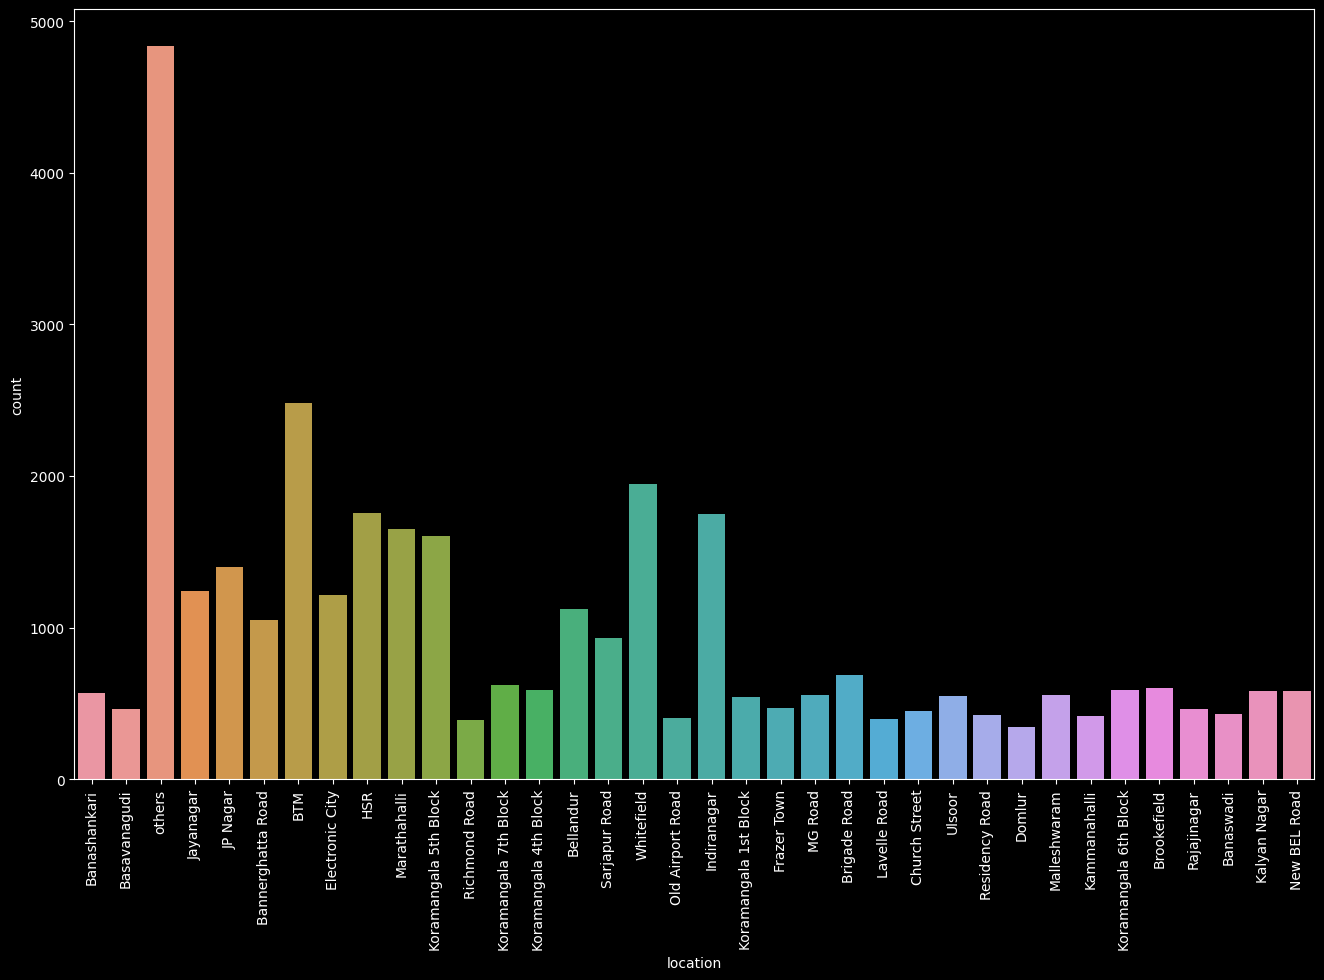

In [20]:
plt.figure(figsize=(16, 10))
sns.countplot(x='location', data=df)
plt.xticks(rotation=90)
plt.show()


# 2. Visulalizing Online Order

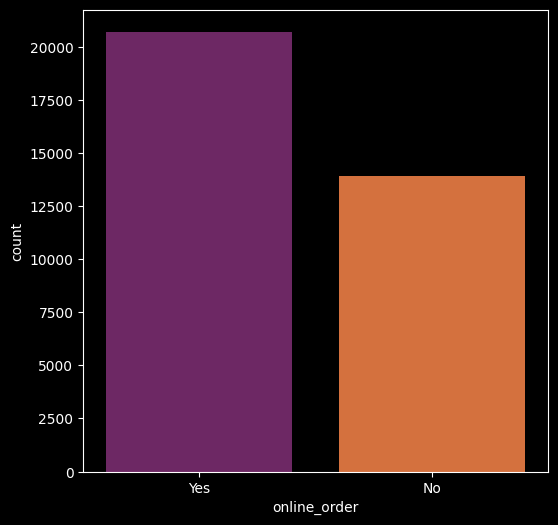

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['online_order'], palette='inferno')
plt.show()

# 3. Visualizing Book Table

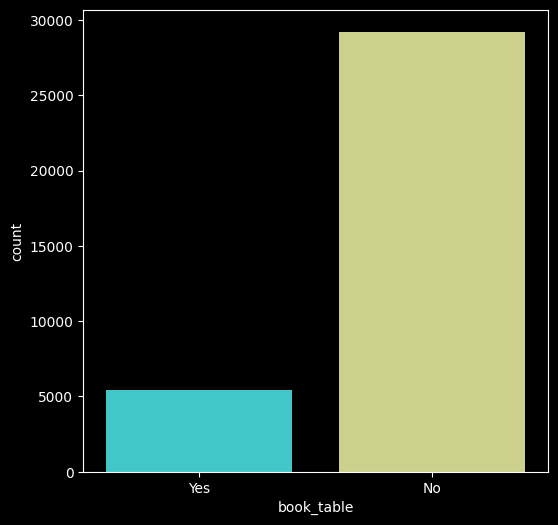

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['book_table'], palette='rainbow')
plt.show()

# 4. Visualizing Online Order vs Rate

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


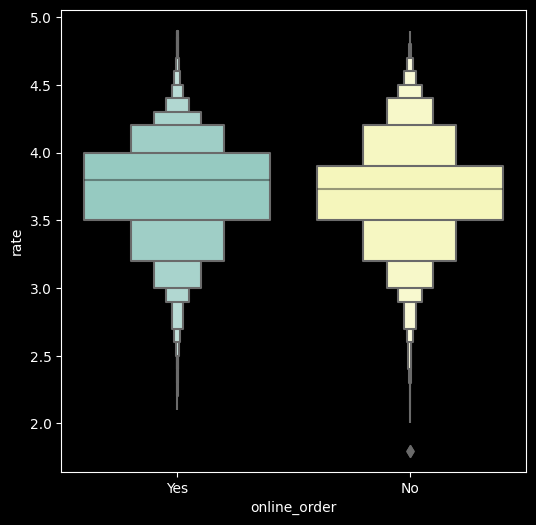

In [23]:
plt.figure(figsize=(6, 6))
sns.boxenplot(x='online_order', y='rate', data=df)
plt.show()

# 5. Visuakizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

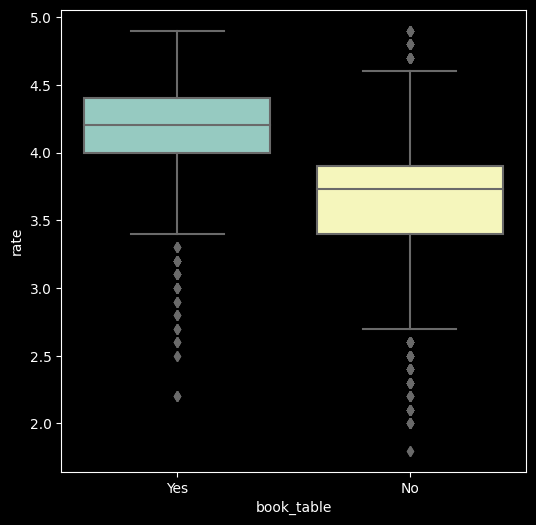

In [24]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='book_table', y='rate', data=df)

# 6. Visualizing Online Order Facility, Location Wise

In [25]:
# Group by location and online_order, counting the number of names for each group
df1 = df.groupby(['location', 'online_order'])['name'].count().reset_index()

# Save the grouped data to a Parquet file
df1.to_parquet('location_online.parquet')

# Read the data back from the Parquet file
df1 = pd.read_parquet('location_online.parquet')

# Create a pivot table to summarize the data
df1 = pd.pivot_table(df1, values='name', index='location', columns='online_order', fill_value=0, aggfunc='sum')

# Display the pivot table
df1

online_order,No,Yes
location,,
BTM,802,1682
Banashankari,260,311
Banaswadi,208,219
Bannerghatta Road,399,653
Basavanagudi,182,281
...,...,...
Richmond Road,249,140
Sarjapur Road,282,651
Ulsoor,201,345


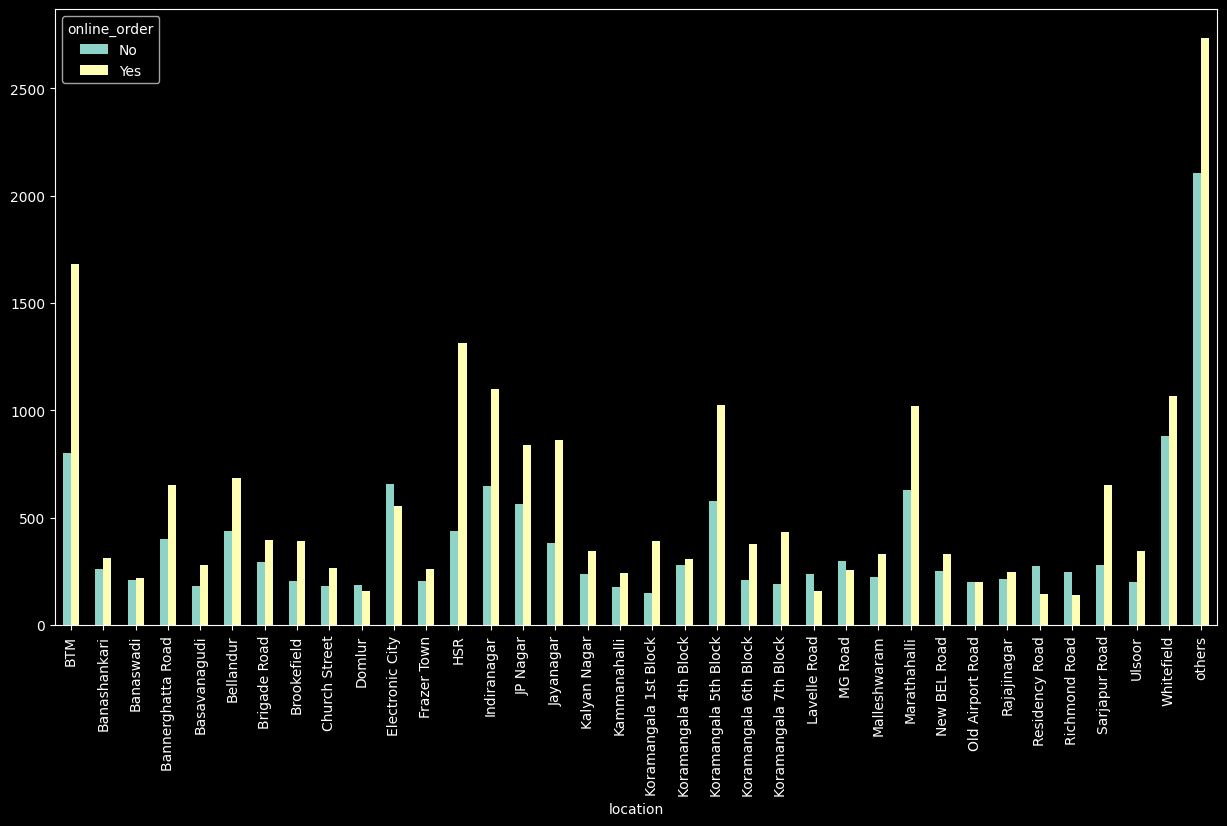

In [26]:
# Generate a bar plot from the DataFrame df1
df1.plot(kind='bar', figsize=(15, 8))
plt.show()

# 7. Visualizing Book Table Facility, Location Wise

In [27]:
# Group by location and book_table, counting the number of names for each group
df2 = df.groupby(['location', 'book_table'])['name'].count().reset_index()

# Save the grouped data to a Parquet file
df2.to_parquet('location_booktable.parquet')

# Read the data back from the Parquet file
df2 = pd.read_parquet('location_booktable.parquet')

# Create a pivot table to summarize the data
df2 = pd.pivot_table(df2, values='name', index='location', columns='book_table', fill_value=0, aggfunc='sum')

# Display the pivot table
df2

book_table,No,Yes
location,,
BTM,2358,126
Banashankari,528,43
Banaswadi,421,6
Bannerghatta Road,973,79
Basavanagudi,451,12
...,...,...
Richmond Road,308,81
Sarjapur Road,786,147
Ulsoor,433,113


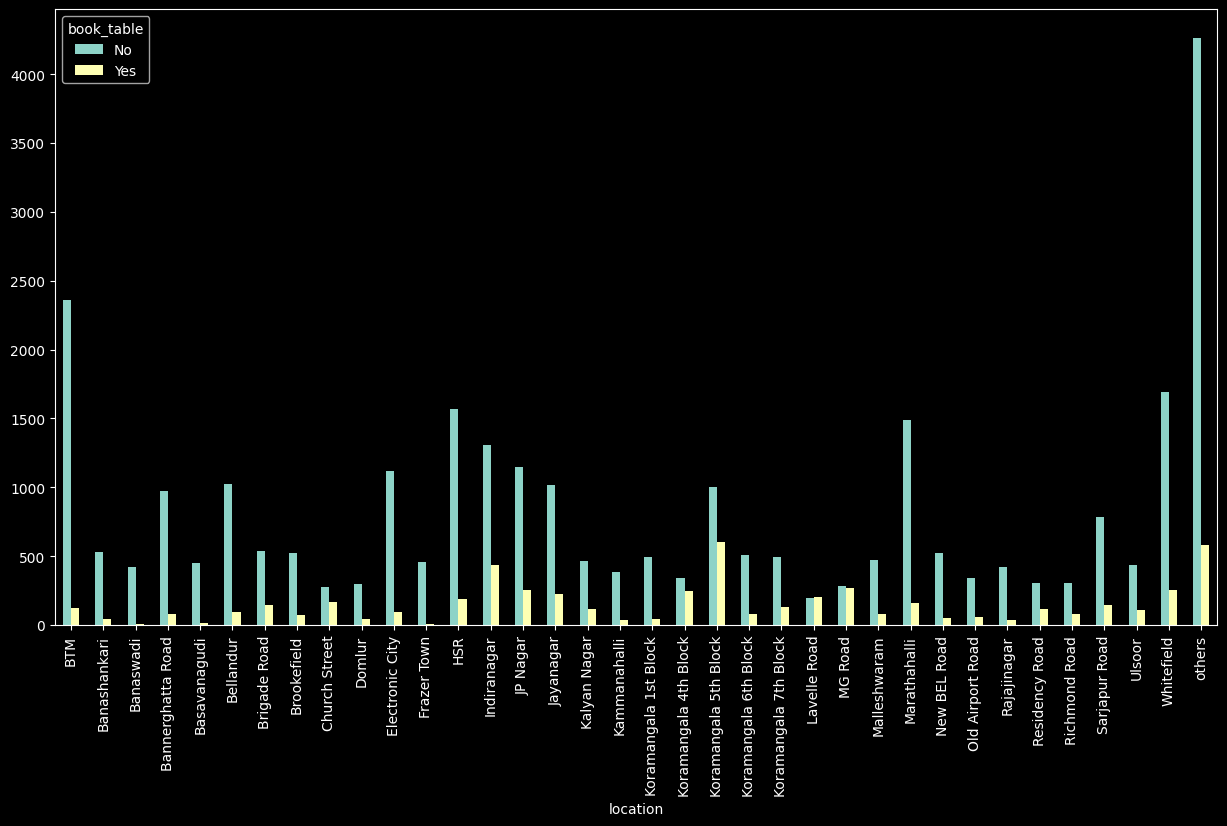

In [28]:
# Generate a bar plot from the DataFrame df2
df2.plot(kind='bar', figsize=(15, 8))
plt.show()

# 8. Visualizing Types of Restorents vs Rate

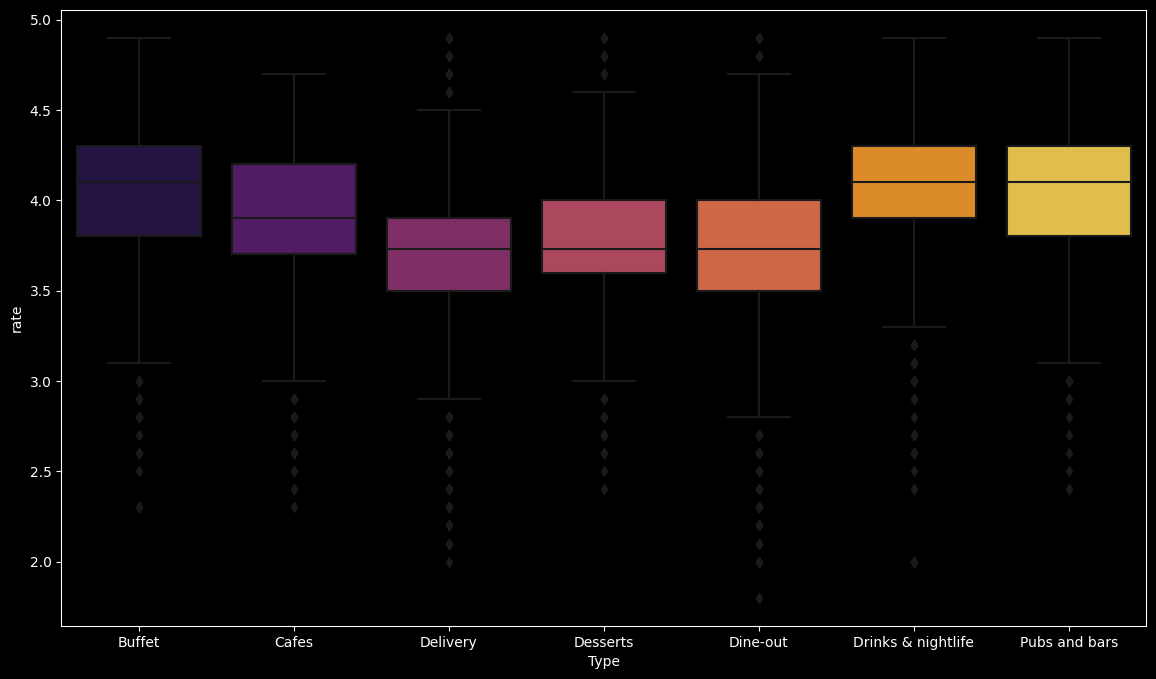

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='rate', data=df, palette='inferno')
plt.show()

# 9. Grouping Types of Restaurents, location wise

In [30]:
# Group by location and book_table, counting the number of names for each group
df3 = df.groupby(['location', 'Type'])['name'].count().reset_index()

# Save the grouped data to a Parquet file
df3.to_parquet('location_Type.parquet')

# Read the data back from the Parquet file
df3 = pd.read_parquet('location_Type.parquet')

# Create a pivot table to summarize the data
df3 = pd.pivot_table(df3, values='name', index='location', columns='Type', fill_value=0, aggfunc='sum')

# Display the pivot table
df3

Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,15,46,1418,110,866,15,14
Banashankari,5,24,243,46,246,7,0
Banaswadi,0,13,157,19,233,4,1
Bannerghatta Road,8,27,510,92,404,9,2
Basavanagudi,4,8,195,45,208,3,0
...,...,...,...,...,...,...,...
Richmond Road,41,13,110,37,172,7,9
Sarjapur Road,23,19,473,78,299,19,22
Ulsoor,12,32,217,38,216,16,15


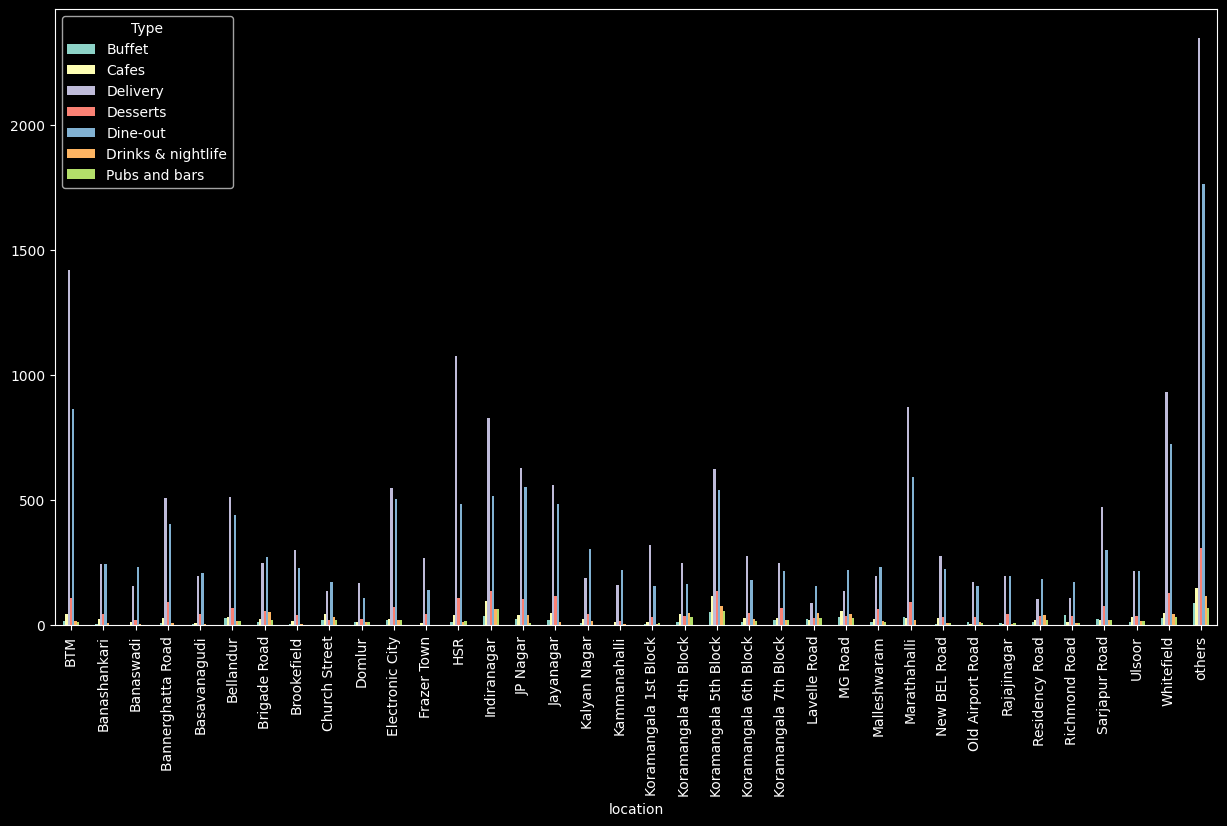

In [31]:
# Generate a bar plot from the DataFrame df2
df3.plot(kind='bar', figsize=(15, 8))
plt.show()

# 10. No of Votes, Location Wise

In [32]:
# Selecting columns 'location' and 'votes' from the DataFrame
df4 = df[['location', 'votes']].copy()  # Explicitly create a copy of the DataFrame

# Dropping duplicate rows
df4.drop_duplicates(inplace=True)

# Grouping by 'location' and summing the 'votes' column
df5 = df4.groupby(['location'])['votes'].sum()

# Converting the resulting Series to a DataFrame
df5 = df5.to_frame()

# Sorting the DataFrame by the 'votes' column in descending order
df5 = df5.sort_values('votes', ascending=False)

# Displaying the first few rows of the DataFrame
df5.head()


,votes
location,
Koramangala 5th Block,1063061
Indiranagar,648886
others,412784
Church Street,291543
Koramangala 4th Block,282003


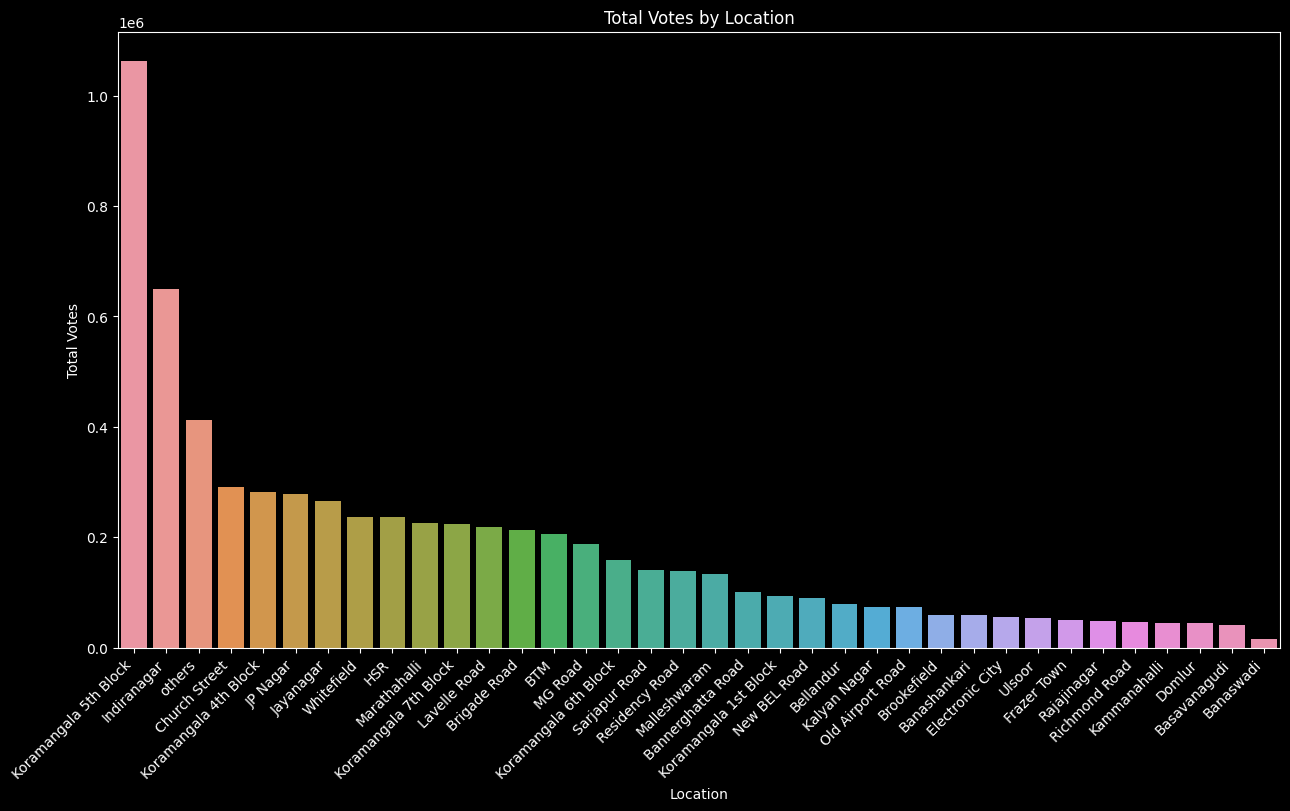

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees for better readability
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.title('Total Votes by Location')
plt.show()

# 11. Visualizing Top Cuisines

In [34]:
# Selecting the required columns and creating a copy
df6 = df[['cuisines', 'votes']].copy()

# Dropping duplicate rows based on the 'cuisines' column
df6.drop_duplicates(inplace=True)

# Grouping by 'cuisines' and summing the 'votes'
df7 = df6.groupby(['cuisines'])['votes'].sum()

# Converting the Series to a DataFrame
df7 = df7.to_frame()

# Sorting the DataFrame by 'votes' in descending order
df7 = df7.sort_values('votes', ascending=False)

# Displaying the top few rows of the DataFrame
df7.head()


,votes
cuisines,
others,4020185
North Indian,242761
South Indian,87286
"North Indian, Chinese",82290
"North Indian, Mughlai",65813


In [35]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,242761
South Indian,87286
"North Indian, Chinese",82290
"North Indian, Mughlai",65813
Chinese,40613


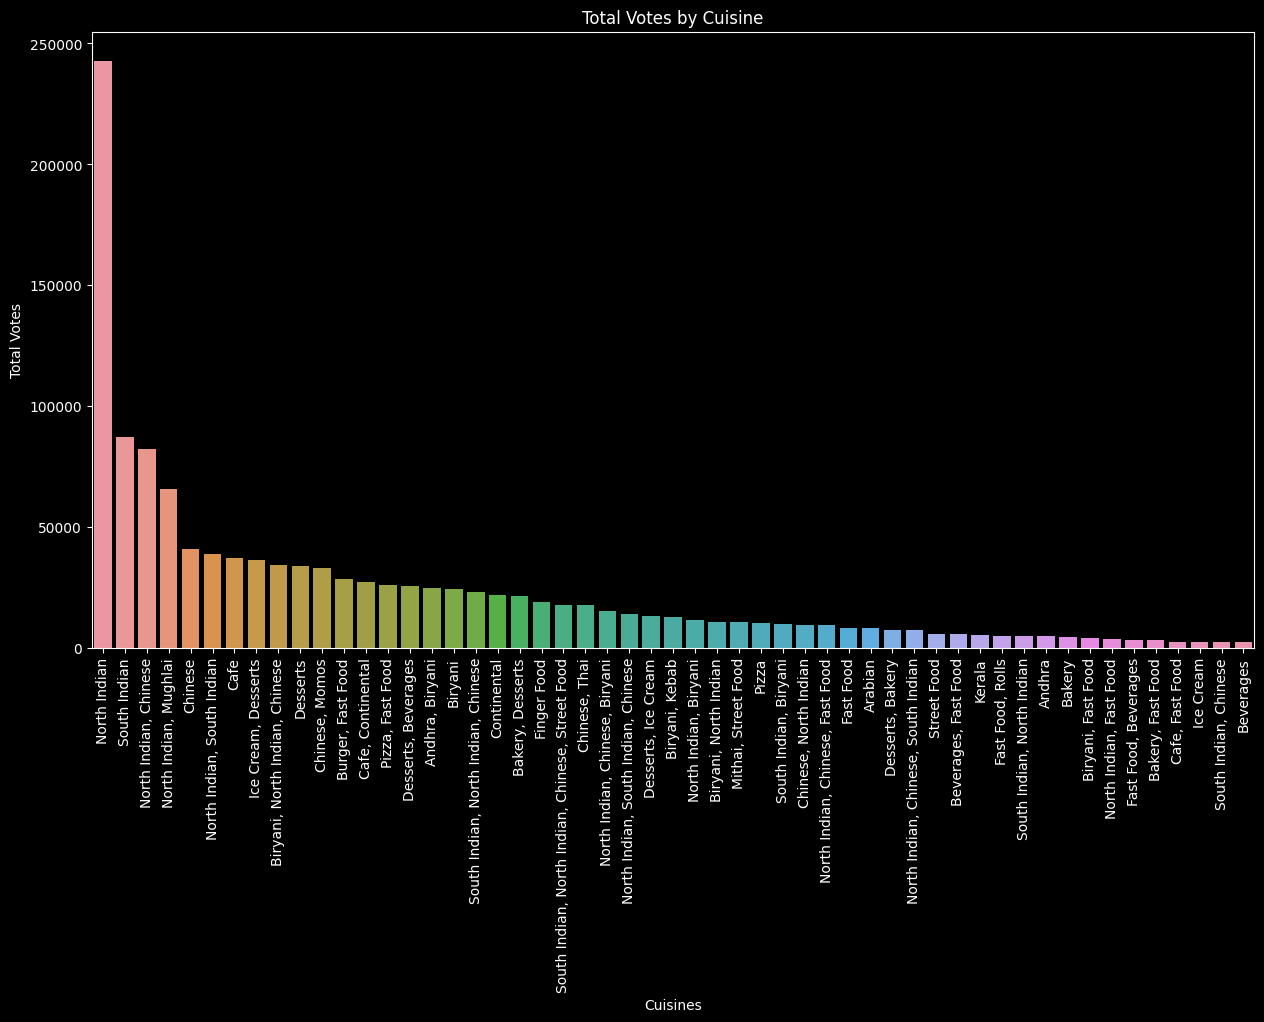

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)
plt.xlabel('Cuisines')
plt.ylabel('Total Votes')
plt.title('Total Votes by Cuisine')
plt.show()

# Done!!